In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\arjun\OneDrive\Desktop\Dowloads from AI\titanic.csv')

In [3]:
 # df =pd.read_excel(r'C:\Users\arjun\OneDrive\Desktop\Dowloads from AI\titanic.xlsx')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [6]:
eliminate = ['Name','Ticket','PassengerId','Cabin','Embarked']
df.drop(eliminate,axis = 1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [7]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.groupby('Survived').mean()

,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,,,,,,
0,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1.950292,0.318713,28.343690,0.473684,0.464912,48.395408


In [9]:
df.groupby(df['Age'].isnull()).mean() ## age known or unknown 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Age,,,,,,,
False,0.406162,2.236695,0.634454,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,0.700565,NaN,0.564972,0.180791,22.158567


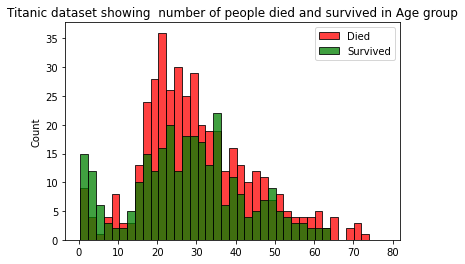

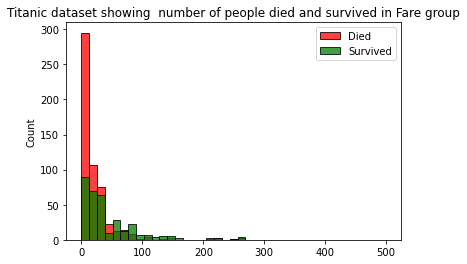

In [10]:
for i in ['Age','Fare']:
    died = list(df[df['Survived'] == 0][i].dropna())
    survived = list(df[df['Survived'] == 1][i].dropna())
    Xmin = min(min(died),min(survived))
    Xmax = max(max(died),max(survived))
    width = (Xmax - Xmin)/40
    sns.histplot(died,color = 'r', kde = False , bins = np.arange(Xmin,Xmax,width))
    sns.histplot(survived,color='g',kde = False , bins = np.arange(Xmin,Xmax,width))
    plt.legend(['Died','Survived'])
    plt.title("Titanic dataset showing  number of people died and survived in {} group".format(i))
    plt.show()

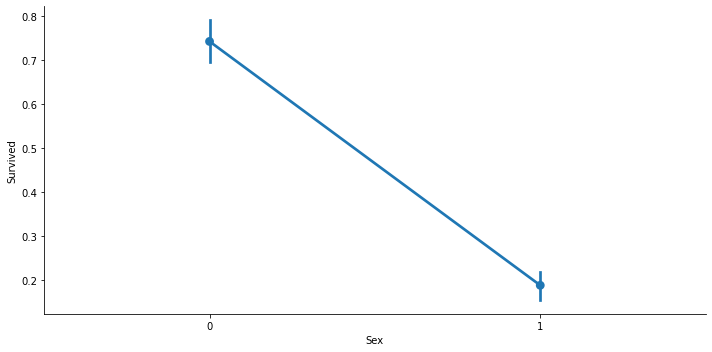

In [11]:
# overall analysis shows female had survived more
sns.catplot(x = 'Sex' , y = 'Survived' , data =df , kind = 'point', aspect = 2) 

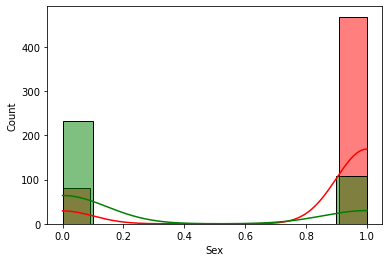

In [85]:
died = df[df['Survived'] == 0]['Sex']
survived = df[df['Survived'] == 1]['Sex']
sns.histplot(died ,color = 'r', kde = True)
sns.histplot(survived , color = 'g' , kde= True)
plt.show()

<Figure size 432x288 with 0 Axes>

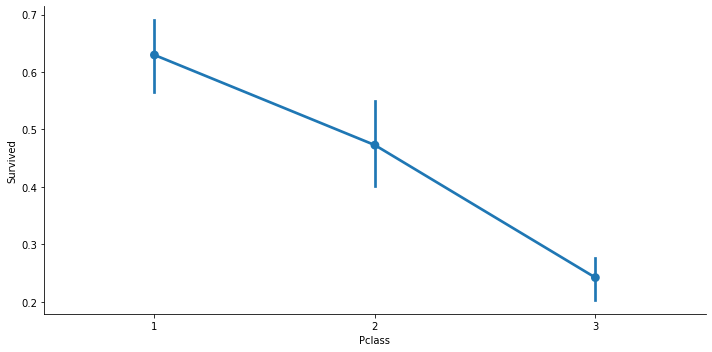

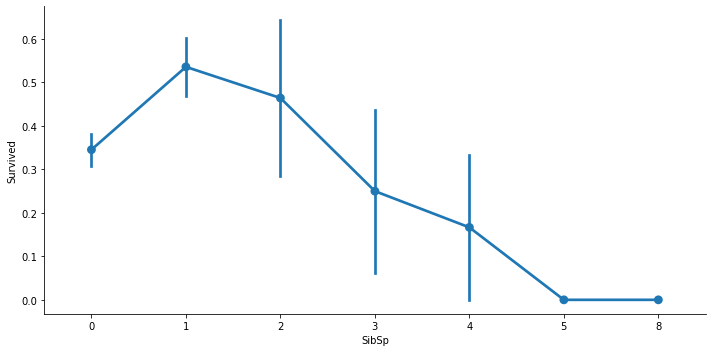

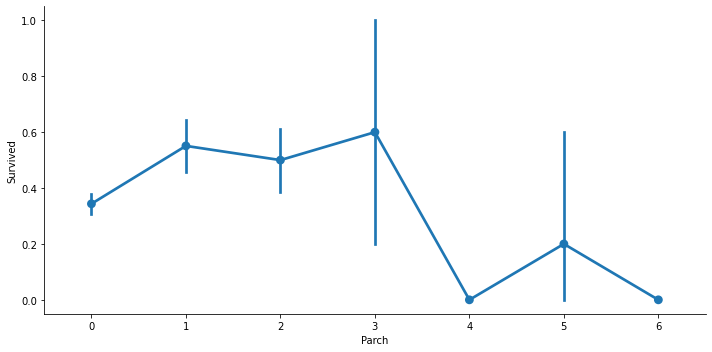

In [86]:
for i, col in enumerate(['Pclass','SibSp','Parch']):
    plt.figure(i)
    sns.catplot(x = col , y = 'Survived' , data = df , aspect =2 , kind = 'point')

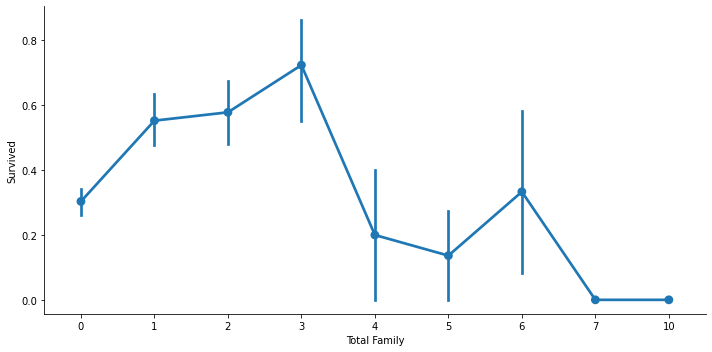

In [87]:
df['Total Family'] = df['SibSp'] + df['Parch']
sns.catplot(x = 'Total Family' , y = 'Survived', data = df , kind = 'point',aspect = 2)

## Cleaning dataSet 

In [93]:
df.drop('Total Family', axis=1 ,inplace = True)

In [ ]:
df['Family size'] = df['SibSp'] + df['Parch']
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
df.head()

In [94]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Family size
0,0,3,1,22.0,7.2500,1
1,1,1,0,38.0,71.2833,1
2,1,3,0,26.0,7.9250,0
3,1,1,0,35.0,53.1000,1
4,0,3,1,35.0,8.0500,0
